In [1]:
# Import Libraries
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loop to view how columns vary by year
files = glob.glob(r"C:\Users\toddt\Desktop\Wages_Data\Wages_*.xlsx")

columns_by_year = {}

for f in files:
    year = int(re.search(r'20\d{2}', f).group())
    df = pd.read_excel(f, nrows = 5, engine="openpyxl")
    df.columns = df.columns.str.strip()
    columns_by_year[year] = set(df.columns)

for year, cols in sorted(columns_by_year.items()):
    print(f"{year} columns:")
    print(sorted(cols))




2014 columns:
['ANNUAL', 'AREA', 'AREA_NAME', 'A_MEAN', 'A_MEDIAN', 'A_PCT10', 'A_PCT25', 'A_PCT75', 'A_PCT90', 'EMP_PRSE', 'HOURLY', 'H_MEAN', 'H_MEDIAN', 'H_PCT10', 'H_PCT25', 'H_PCT75', 'H_PCT90', 'JOBS_1000', 'LOC QUOTIENT', 'MEAN_PRSE', 'OCC_CODE', 'OCC_GROUP', 'OCC_TITLE', 'PRIM_STATE', 'TOT_EMP']
2015 columns:
['ANNUAL', 'AREA', 'AREA_NAME', 'A_MEAN', 'A_MEDIAN', 'A_PCT10', 'A_PCT25', 'A_PCT75', 'A_PCT90', 'EMP_PRSE', 'HOURLY', 'H_MEAN', 'H_MEDIAN', 'H_PCT10', 'H_PCT25', 'H_PCT75', 'H_PCT90', 'JOBS_1000', 'LOC QUOTIENT', 'MEAN_PRSE', 'OCC_CODE', 'OCC_GROUP', 'OCC_TITLE', 'PRIM_STATE', 'TOT_EMP']
2016 columns:
['ANNUAL', 'AREA', 'AREA_NAME', 'A_MEAN', 'A_MEDIAN', 'A_PCT10', 'A_PCT25', 'A_PCT75', 'A_PCT90', 'EMP_PRSE', 'HOURLY', 'H_MEAN', 'H_MEDIAN', 'H_PCT10', 'H_PCT25', 'H_PCT75', 'H_PCT90', 'JOBS_1000', 'LOC QUOTIENT', 'MEAN_PRSE', 'OCC_CODE', 'OCC_GROUP', 'OCC_TITLE', 'PRIM_STATE', 'TOT_EMP']
2017 columns:
['ANNUAL', 'AREA', 'AREA_NAME', 'A_MEAN', 'A_MEDIAN', 'A_PCT10', 'A_PCT

In [5]:
#Loop to combine files
files = glob.glob(r"C:\Users\toddt\Desktop\Wages_Data\Wages_*.xlsx")
print(files)

dfs = []
rename_dict = {'AREA':'area',
              'area_name':'area_title'
              }
for f in files:
    print(f"Reading {f}...")
    df = pd.read_excel(f, engine="openpyxl")
    df.columns = df.columns.str.strip().str.lower()
    df = df.rename(columns=rename_dict)
    year = int(f.split("_")[-1].replace(".xlsx", ""))
    df['year'] = year
    
    
    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)




['C:\\Users\\toddt\\Desktop\\Wages_Data\\Wages_2014.xlsx', 'C:\\Users\\toddt\\Desktop\\Wages_Data\\Wages_2015.xlsx', 'C:\\Users\\toddt\\Desktop\\Wages_Data\\Wages_2016.xlsx', 'C:\\Users\\toddt\\Desktop\\Wages_Data\\Wages_2017.xlsx', 'C:\\Users\\toddt\\Desktop\\Wages_Data\\Wages_2018.xlsx', 'C:\\Users\\toddt\\Desktop\\Wages_Data\\Wages_2019.xlsx', 'C:\\Users\\toddt\\Desktop\\Wages_Data\\Wages_2020.xlsx', 'C:\\Users\\toddt\\Desktop\\Wages_Data\\Wages_2021.xlsx', 'C:\\Users\\toddt\\Desktop\\Wages_Data\\Wages_2022.xlsx', 'C:\\Users\\toddt\\Desktop\\Wages_Data\\Wages_2023.xlsx', 'C:\\Users\\toddt\\Desktop\\Wages_Data\\Wages_2024.xlsx']
Reading C:\Users\toddt\Desktop\Wages_Data\Wages_2014.xlsx...
Reading C:\Users\toddt\Desktop\Wages_Data\Wages_2015.xlsx...
Reading C:\Users\toddt\Desktop\Wages_Data\Wages_2016.xlsx...
Reading C:\Users\toddt\Desktop\Wages_Data\Wages_2017.xlsx...
Reading C:\Users\toddt\Desktop\Wages_Data\Wages_2018.xlsx...
Reading C:\Users\toddt\Desktop\Wages_Data\Wages_2019.xls

In [7]:
# Assuring all column names were changed and concatenated successfully
print(sorted(merged_df.columns))

['a_mean', 'a_median', 'a_pct10', 'a_pct25', 'a_pct75', 'a_pct90', 'annual', 'area', 'area_title', 'area_type', 'emp_prse', 'h_mean', 'h_median', 'h_pct10', 'h_pct25', 'h_pct75', 'h_pct90', 'hourly', 'i_group', 'jobs_1000', 'loc quotient', 'loc_quotient', 'mean_prse', 'naics', 'naics_title', 'o_group', 'occ_code', 'occ_group', 'occ_title', 'own_code', 'pct_rpt', 'pct_total', 'prim_state', 'tot_emp', 'year']


In [9]:
# Selecting needed columns and filtering on 'All Occupations'
merged_selected = merged_df[['year','area','area_title', 'occ_title', 'a_mean', 'a_median', 'a_pct10', 'a_pct25', 'a_pct75',
                                  'a_pct90']]
merged_filtered = merged_selected[merged_selected['occ_title'].str.contains('All Occupations', case=False, na=False)].copy()
print(merged_filtered.head())


      year   area             area_title        occ_title a_mean a_median  \
0     2014  11260          Anchorage, AK  All Occupations  54700    44020   
457   2014  21820          Fairbanks, AK  All Occupations  54920    47220   
677   2014  11500    Anniston-Oxford, AL  All Occupations  36450    29960   
884   2014  12220     Auburn-Opelika, AL  All Occupations  36910    27050   
1109  2014  13820  Birmingham-Hoover, AL  All Occupations  43970    33920   

     a_pct10 a_pct25 a_pct75 a_pct90  
0      21310   29260   69530   97690  
457    22970   32120   71140   96150  
677    17060   19420   45790   60440  
884    16800   18780   44590   68700  
1109   17590   21720   53470   79480  


In [10]:
# Checking for null values
print(merged_filtered.isnull().sum())
print(merged_filtered.shape)

year          0
area          0
area_title    0
occ_title     0
a_mean        0
a_median      0
a_pct10       0
a_pct25       0
a_pct75       0
a_pct90       0
dtype: int64
(4435, 10)


In [13]:
# Checking which areas are present in all 11 years
area_year=merged_filtered.groupby('area')['year'].nunique().reset_index()
area_year=area_year.sort_values('year', ascending=False)
print(area_year.head())

      area  year
0    10180    11
229  29820    11
237  30620    11
395  44220    11
235  30460    11


In [17]:
# Getting key details on New York metro to better understand potential problems with the data
new_york=merged_filtered[merged_filtered['area_title'].str.contains('New York', case=False, na=False)]
print(new_york.head())

        year   area                                         area_title  \
99479   2014  35644  New York-White Plains-Wayne, NY-NJ Metropolita...   
256167  2015  35614  New York-Jersey City-White Plains, NY-NJ Metro...   
414755  2016  35614  New York-Jersey City-White Plains, NY-NJ Metro...   
572066  2017  35614  New York-Jersey City-White Plains, NY-NJ Metro...   
717680  2018  35620              New York-Newark-Jersey City, NY-NJ-PA   

              occ_title a_mean a_median a_pct10 a_pct25 a_pct75 a_pct90  
99479   All Occupations  61640    45200   19140   26440   77640  120930  
256167  All Occupations  61300    44720   19490   26130   76420  121350  
414755  All Occupations  63320    46040   19940   26870   78590  125310  
572066  All Occupations  64400    46620   20870   27340   79740  127430  
717680  All Occupations  64550    47080   22780   28680   79960  126570  


In [19]:
# Cutting off state abbreviations from area title
merged_filtered.loc[:, 'area_title_clean'] = (merged_df['area_title'].str.replace(r',.*', '', regex=True)
                                       .str.replace(r'\s+', ' ', regex=True)
                                       .str.strip())
print(merged_filtered['area_title_clean'].head(5))

0               Anchorage
457             Fairbanks
677       Anniston-Oxford
884        Auburn-Opelika
1109    Birmingham-Hoover
Name: area_title_clean, dtype: object


In [20]:
# Seperating cities on '-'
merged_filtered.loc[:,'city'] = merged_filtered['area_title_clean'].str.split('-')
print(merged_filtered['city'].head(10))

0                     [Anchorage]
457                   [Fairbanks]
677            [Anniston, Oxford]
884             [Auburn, Opelika]
1109         [Birmingham, Hoover]
1689                    [Decatur]
1942                     [Dothan]
2195    [Florence, Muscle Shoals]
2444                    [Gadsden]
2623                 [Huntsville]
Name: city, dtype: object


In [23]:
# Creating seperate state column
merged_filtered.loc[:,'state'] = merged_df['area_title'].str.extract(r',\s*([A-Z]{2}(?:-[A-Z]{2})*)', expand=False)
print(merged_filtered['state'].head())

0       AK
457     AK
677     AL
884     AL
1109    AL
Name: state, dtype: object


In [25]:
# Exploding city names to seperate rows
wage_df = merged_filtered.explode('city').reset_index(drop=True)
wage_df['city'] = wage_df['city'].str.strip() 
print(wage_df.head())

   year   area           area_title        occ_title a_mean a_median a_pct10  \
0  2014  11260        Anchorage, AK  All Occupations  54700    44020   21310   
1  2014  21820        Fairbanks, AK  All Occupations  54920    47220   22970   
2  2014  11500  Anniston-Oxford, AL  All Occupations  36450    29960   17060   
3  2014  11500  Anniston-Oxford, AL  All Occupations  36450    29960   17060   
4  2014  12220   Auburn-Opelika, AL  All Occupations  36910    27050   16800   

  a_pct25 a_pct75 a_pct90 area_title_clean       city state  
0   29260   69530   97690        Anchorage  Anchorage    AK  
1   32120   71140   96150        Fairbanks  Fairbanks    AK  
2   19420   45790   60440  Anniston-Oxford   Anniston    AL  
3   19420   45790   60440  Anniston-Oxford     Oxford    AL  
4   18780   44590   68700   Auburn-Opelika     Auburn    AL  


In [181]:
# Exporting cleaned data to csv
wage_df.to_csv('bls_cleaned_2014_2024.csv', index=False)

In [27]:
# Reading in zillow data
z_df = pd.read_csv(r"C:\Users\toddt\Desktop\Zillow_Prices.csv", nrows = 100)
print(z_df.head(5))

   RegionID  SizeRank       RegionName RegionType StateName     2000-01-31  \
0    102001         0    United States    country       NaN  123266.200632   
1    394913         1     New York, NY        msa        NY  220834.762563   
2    753899         2  Los Angeles, CA        msa        CA  222015.511375   
3    394463         3      Chicago, IL        msa        IL  156057.927247   
4    394514         4       Dallas, TX        msa        TX  128589.525231   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  123483.065395  123752.009633  124328.842231  124992.707395  ...   
1  221773.185705  222720.300336  224639.521066  226626.940595  ...   
2  222841.690769  223942.153841  226131.705683  228526.388970  ...   
3  156202.391427  156477.526001  157161.992446  157985.323252  ...   
4  128646.799455  128712.642038  128883.628311  129109.069031  ...   

      2024-11-30     2024-12-31     2025-01-31     2025-02-28     2025-03-31  \
0  364462.357353  365188.64037

In [29]:
# Eliminating state abbreviation
z_df['RegionName'] = (z_df['RegionName'].str.replace(r',.*', '', regex=True)
                      .str.strip())
print(z_df['RegionName'].tail())

95        Jackson
96     Harrisburg
97        Spokane
98       Scranton
99    Chattanooga
Name: RegionName, dtype: object


In [31]:
# Melting from wide to long data
z_long = (z_df.melt(
    id_vars = ['RegionName', 'StateName', 'RegionID', 'SizeRank', 'RegionType'],
    var_name = 'date',
    value_name = 'home_price'
)
         .assign(date = lambda df: pd.to_datetime(df['date'], errors = 'coerce'))
)
print(z_long.head())

      RegionName StateName  RegionID  SizeRank RegionType       date  \
0  United States       NaN    102001         0    country 2000-01-31   
1       New York        NY    394913         1        msa 2000-01-31   
2    Los Angeles        CA    753899         2        msa 2000-01-31   
3        Chicago        IL    394463         3        msa 2000-01-31   
4         Dallas        TX    394514         4        msa 2000-01-31   

      home_price  
0  123266.200632  
1  220834.762563  
2  222015.511375  
3  156057.927247  
4  128589.525231  


In [33]:
# Creating separate columns for year and month
z_long['year'] = z_long['date'].dt.year
z_long['month'] = z_long['date'].dt.month
print(z_long.head())

      RegionName StateName  RegionID  SizeRank RegionType       date  \
0  United States       NaN    102001         0    country 2000-01-31   
1       New York        NY    394913         1        msa 2000-01-31   
2    Los Angeles        CA    753899         2        msa 2000-01-31   
3        Chicago        IL    394463         3        msa 2000-01-31   
4         Dallas        TX    394514         4        msa 2000-01-31   

      home_price  year  month  
0  123266.200632  2000      1  
1  220834.762563  2000      1  
2  222015.511375  2000      1  
3  156057.927247  2000      1  
4  128589.525231  2000      1  


In [35]:
# Filtering on year and month (May 2014-May 2024)
z_filtered = z_long[
    (z_long['month'] == 5) &
    (z_long['year'].between(2014, 2024)) &
    (z_long['RegionName'] != 'United States')
].copy()
print(z_filtered.head())
z_filtered.shape

        RegionName StateName  RegionID  SizeRank RegionType       date  \
17201     New York        NY    394913         1        msa 2014-05-31   
17202  Los Angeles        CA    753899         2        msa 2014-05-31   
17203      Chicago        IL    394463         3        msa 2014-05-31   
17204       Dallas        TX    394514         4        msa 2014-05-31   
17205      Houston        TX    394692         5        msa 2014-05-31   

          home_price  year  month  
17201  408763.534788  2014      5  
17202  476941.004490  2014      5  
17203  193807.267538  2014      5  
17204  167524.466283  2014      5  
17205  167049.495007  2014      5  


(1089, 9)

In [37]:
# Rounding home price to two decimals
z_filtered['home_price'] = z_filtered['home_price'].round(2)
print(z_filtered.head())

        RegionName StateName  RegionID  SizeRank RegionType       date  \
17201     New York        NY    394913         1        msa 2014-05-31   
17202  Los Angeles        CA    753899         2        msa 2014-05-31   
17203      Chicago        IL    394463         3        msa 2014-05-31   
17204       Dallas        TX    394514         4        msa 2014-05-31   
17205      Houston        TX    394692         5        msa 2014-05-31   

       home_price  year  month  
17201   408763.53  2014      5  
17202   476941.00  2014      5  
17203   193807.27  2014      5  
17204   167524.47  2014      5  
17205   167049.50  2014      5  


In [39]:
# Selecting only the neccessary columns
zillow_df = z_filtered[['RegionName', 'StateName', 'year', 'home_price']]
print(zillow_df.head())

        RegionName StateName  year  home_price
17201     New York        NY  2014   408763.53
17202  Los Angeles        CA  2014   476941.00
17203      Chicago        IL  2014   193807.27
17204       Dallas        TX  2014   167524.47
17205      Houston        TX  2014   167049.50


In [127]:
#Exporting clean data to csv
zillow_df.to_csv(r'zillow_cleaned_2014_2024.csv', index = False)

In [41]:
# Merging cleaned BLS and Zillow datasets
merged = pd.merge(wage_df,
         zillow_df,
         left_on=['city','year'],
         right_on=['RegionName', 'year'],
         how = 'inner'
)

print(merged.columns)

Index(['year', 'area', 'area_title', 'occ_title', 'a_mean', 'a_median',
       'a_pct10', 'a_pct25', 'a_pct75', 'a_pct90', 'area_title_clean', 'city',
       'state', 'RegionName', 'StateName', 'home_price'],
      dtype='object')


In [43]:
# Selecting needed columns
Wage_VS_Housing = merged[['year', 'city', 'StateName', 'home_price', 'a_mean', 'a_median', 'a_pct10', 'a_pct25', 'a_pct75', 'a_pct90']].copy()
Wage_VS_Housing.rename(columns={'city':'metro_area'}, inplace=True)
print(Wage_VS_Housing.head())

   year   metro_area StateName  home_price a_mean a_median a_pct10 a_pct25  \
0  2014   Birmingham        AL   144920.28  43970    33920   17590   21720   
1  2014  Little Rock        AR   146198.18  42020    32490   17420   21030   
2  2014      Phoenix        AZ   204791.59  45840    35150   18500   23230   
3  2014       Tucson        AZ   170650.25  42540    32510   18240   21970   
4  2014  Bakersfield        CA   170407.03  44400    32970   18170   20100   

  a_pct75 a_pct90  
0   53470   79480  
1   50970   76000  
2   55780   86600  
3   51420   77910  
4   57290   86050  


In [223]:
# Exporting merged data to csv
Wage_VS_Housing.to_csv('Wage_VS_Housing.csv', index=False)

In [45]:
# Creating House Price-To-Wage metric
Wage_VS_Housing['price_to_wage'] = pd.to_numeric(Wage_VS_Housing['home_price'] / Wage_VS_Housing['a_median'])
Wage_VS_Housing['price_to_wage'] = Wage_VS_Housing['price_to_wage'].round(2)

In [47]:
# Creating affordability metric for 10th percentile
Wage_VS_Housing['price_to_wage_10'] = pd.to_numeric(Wage_VS_Housing['home_price'] / Wage_VS_Housing['a_pct10'])
Wage_VS_Housing['price_to_wage_10'] = Wage_VS_Housing['price_to_wage_10'].round(2)

In [49]:
# Creating affordability metric for 90th percentile
Wage_VS_Housing['price_to_wage_90'] = pd.to_numeric(Wage_VS_Housing['home_price'] / Wage_VS_Housing['a_pct90'])
Wage_VS_Housing['price_to_wage_90'] = Wage_VS_Housing['price_to_wage_90'].round(2)
print(Wage_VS_Housing.head())

   year   metro_area StateName  home_price a_mean a_median a_pct10 a_pct25  \
0  2014   Birmingham        AL   144920.28  43970    33920   17590   21720   
1  2014  Little Rock        AR   146198.18  42020    32490   17420   21030   
2  2014      Phoenix        AZ   204791.59  45840    35150   18500   23230   
3  2014       Tucson        AZ   170650.25  42540    32510   18240   21970   
4  2014  Bakersfield        CA   170407.03  44400    32970   18170   20100   

  a_pct75 a_pct90  price_to_wage  price_to_wage_10  price_to_wage_90  
0   53470   79480           4.27              8.24              1.82  
1   50970   76000           4.50              8.39              1.92  
2   55780   86600           5.83             11.07              2.36  
3   51420   77910           5.25              9.36              2.19  
4   57290   86050           5.17              9.38              1.98  


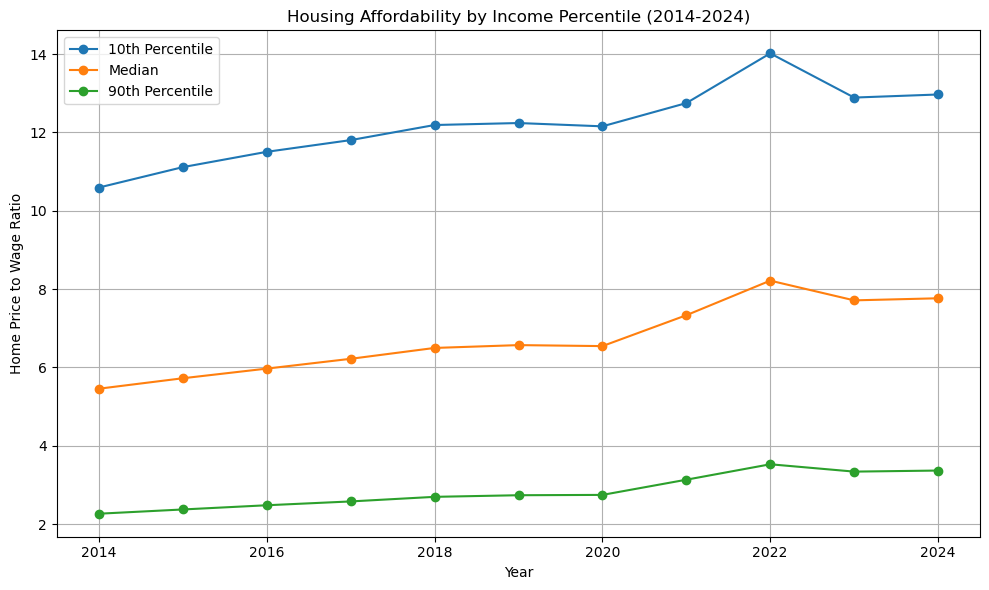

In [51]:
# Plotting affordability metrics for 10, median, and 90th percentiles
affordability = (
    Wage_VS_Housing.groupby('year', as_index = False)
    .agg({'price_to_wage_10':'mean',
          'price_to_wage':'mean',
          'price_to_wage_90':'mean'
         })
)
plt.figure(figsize=(10,6))
plt.plot(affordability['year'], affordability['price_to_wage_10'], marker='o',label = '10th Percentile')
plt.plot(affordability['year'], affordability['price_to_wage'], marker='o',label = 'Median')
plt.plot(affordability['year'], affordability['price_to_wage_90'], marker='o',label = '90th Percentile')
plt.title('Housing Affordability by Income Percentile (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Home Price to Wage Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
    

        

Text(0.5, 1.0, 'Affordability Gap Between 90th and 10th Percentile (2014-2024)')

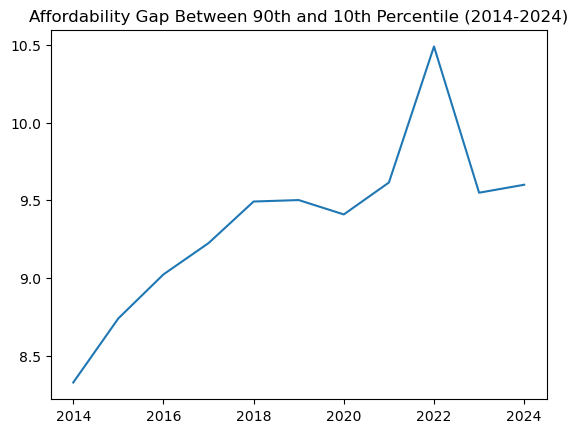

In [53]:
# Creating affordability gap metric and plotting it
affordability['gap_90_10'] = affordability['price_to_wage_10'] - affordability['price_to_wage_90']
plt.plot(affordability['year'], affordability['gap_90_10'])
plt.title('Affordability Gap Between 90th and 10th Percentile (2014-2024)')

<Axes: xlabel='year', ylabel='price_to_wage'>

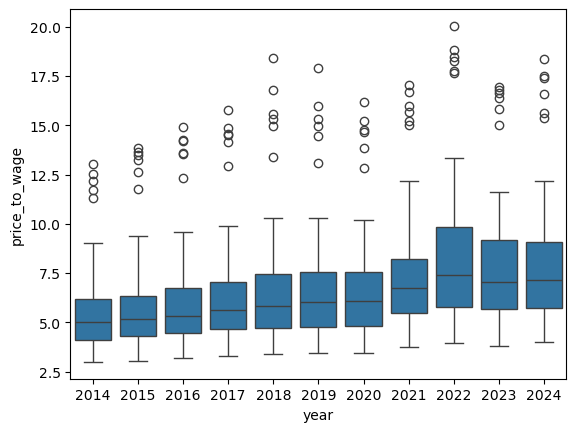

In [55]:
# Showing growth in unaffordability and varianca amongst metros areas
sns.boxplot(data = Wage_VS_Housing, x='year', y='price_to_wage')

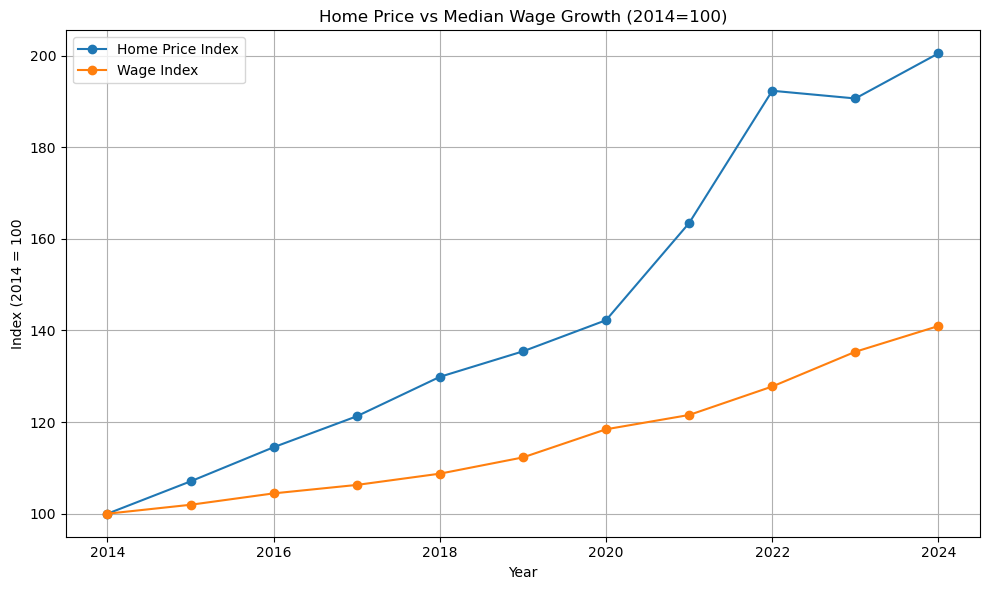

In [57]:
# Creating Indexed wage and home price values and then plotting them
base_year = 2014
national = Wage_VS_Housing.groupby('year')[['home_price', 'a_median']].mean()
national = national / national.loc[base_year] * 100
national = national.reset_index()

plt.figure(figsize=(10,6))
plt.plot(national['year'], national['home_price'], marker ='o', label = 'Home Price Index')
plt.plot(national['year'], national['a_median'], marker='o',label = 'Wage Index')
plt.title('Home Price vs Median Wage Growth (2014=100)')
plt.xlabel('Year')
plt.ylabel('Index (2014 = 100')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



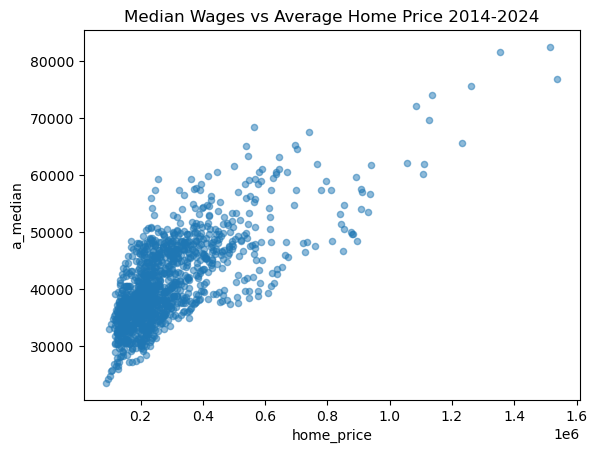

In [59]:
# Showing wage vs Home price
Wage_VS_Housing.plot(
    x = 'home_price',
    y = 'a_median',
    kind = 'scatter',
    alpha = 0.5,
    title = 'Median Wages vs Average Home Price 2014-2024'
)
plt.show()


   year   metro_area  price_to_wage
0  2014   Birmingham           4.27
1  2014  Little Rock           4.50
2  2014      Phoenix           5.83
3  2014       Tucson           5.25
4  2014  Bakersfield           5.17
